# Ejercicio

Se le brinda un set de adtos sintéticos a los cuales debe de aplicarle el método de K-Means y el de GMM. 
Al finalizar comparar los resultados.

In [46]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")

In [67]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y_true = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)
X[:, 0] = X[:, 0]*10
X1 = X.reshape(-1, 1)
k_arr = np.arange(10) + 1
models = [ GaussianMixture(n_components=k).fit(X1) for k in k_arr]

In [68]:
# Plot function

def plot_mixture(gmm, X, show_legend=True, ax=None):
    if ax is None:
        ax = plt.gca()
    
    # Compute PDF of whole mixture
    x = np.linspace(-6, 6, 1000)
    logprob = gmm.score_samples(x.reshape(-1, 1))
    pdf = np.exp(logprob)
    
    # Compute PDF for each component
    responsibilities = gmm.predict_proba(x.reshape(-1, 1))
    pdf_individual = responsibilities * pdf[:, np.newaxis]

    # Plot data histogram
    ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4, label='Data')

    # Plot PDF of whole model
    ax.plot(x, pdf, '-k', label='Mixture PDF')

    # Plot PDF of each component
    ax.plot(x, pdf_individual, '--', label='Component PDF')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')
    if show_legend:
        ax.legend()

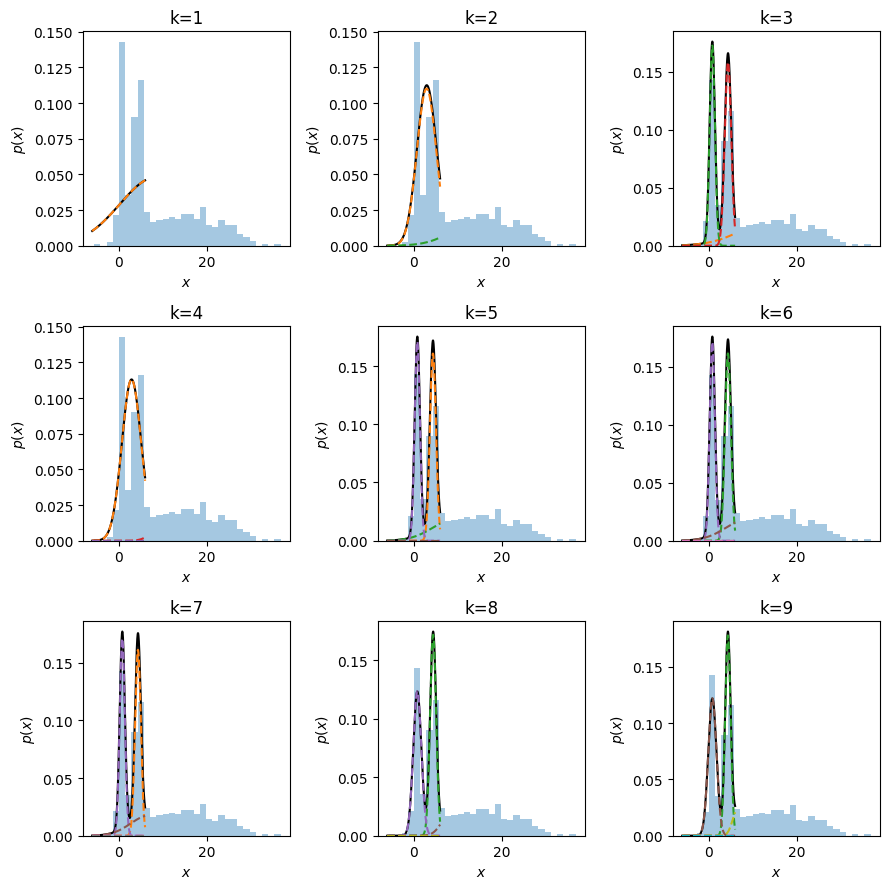

In [69]:
# Show all models for n_components 1 to 9
_, axes = plt.subplots(3, 3, figsize=np.array([3,3])*3, dpi=100)
for gmm, ax in zip(models, axes.ravel()):
    plot_mixture(gmm, X1, show_legend=False, ax=ax)
    ax.set_title(f'k={gmm.n_components}')
    plt.tight_layout()

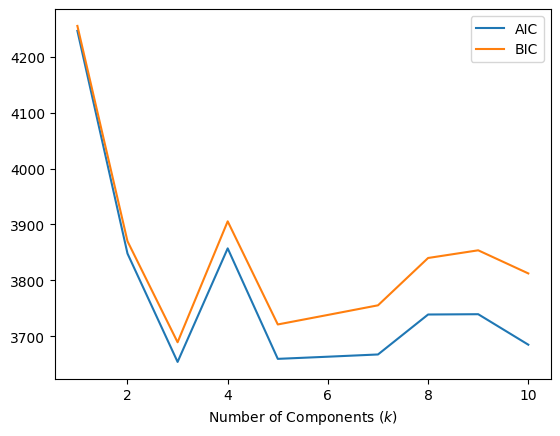

In [70]:
# Compute metrics to determine best hyperparameter
AIC = [m.aic(X1) for m in models]
BIC = [m.bic(X1) for m in models]
# Plot these metrics
plt.plot(k_arr, AIC, label='AIC')
plt.plot(k_arr, BIC, label='BIC')
plt.xlabel('Number of Components ($k$)')
plt.legend()

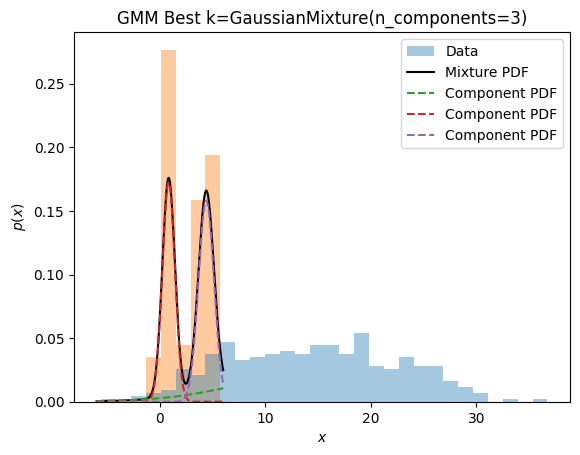

In [71]:
gmm_best = models[np.argmin(AIC)]
plt.title(f'GMM Best k={gmm_best}')
plot_mixture(gmm_best, X)

## K-Means

In [43]:
# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# X3, y_true = make_blobs(n_samples=300, centers=2,
# cluster_std=0.60, random_state=0)
# X3[:, 0] = X3[:, 0]*10

(-7.6695009915020105,
 38.84428241167275,
 -1.2536474338023191,
 5.866108305124282)

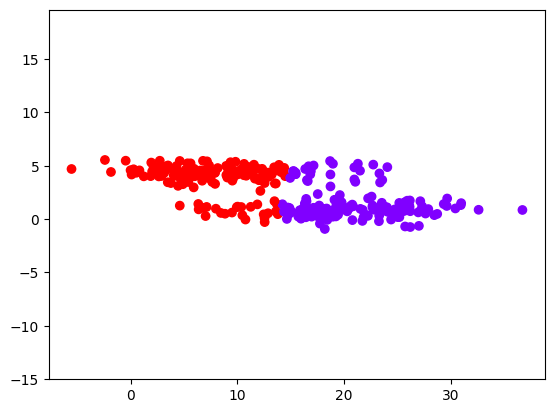

In [74]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.axis('equal')

## GMM

(-7.6695009915020105,
 38.84428241167275,
 -1.2536474338023191,
 5.866108305124282)

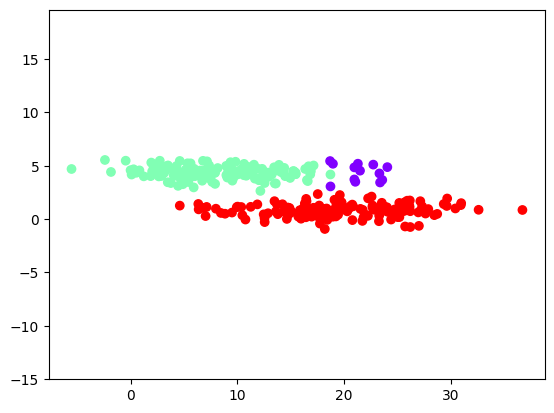

In [76]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0).fit(X)
gmm_labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=gmm_labels, cmap='rainbow')
plt.axis('equal')